# TODO
    - Find a way to import modules using (relative) path 

In [1]:
# Automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("../../FastAi")
print(sys.path)

['', '/home/sindre/anaconda3/envs/fastai/lib/python36.zip', '/home/sindre/anaconda3/envs/fastai/lib/python3.6', '/home/sindre/anaconda3/envs/fastai/lib/python3.6/lib-dynload', '/home/sindre/anaconda3/envs/fastai/lib/python3.6/site-packages', '/home/sindre/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/extensions', '/home/sindre/.ipython', '../../FastAi']


In [3]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# TODO
> Download the pictures in notebook <br>
>> Use Keras folder structure with "train", "valid", "train/class1", ... 
<br> <br>
>> Rename the pictures <cr>
    
> Refactor the methods 

# Downloading the images

Downloading the images using a program from https://github.com/hardikvasa/google-images-download and running it through bash scripting locally in the notebook. More possible configurations, such as multiple searchwords, different combinations, etc., but this is enough for now. 

To run this method:
> Using pip
> <div class="alert alert-block alert-info">
> \$ pip install google_images_download
</div> <br>
> Manually using CLI
> <div class="alert alert-block alert-info">
> \$ git clone https://github.com/hardikvasa/google-images-download.git <br>
> \$ cd google-images-download && sudo python setup.py install
> </div> <br>  
> Manually using UI
> <div class="alert alert-block alert-info">
> Go to the repo on github ==> Click on *Clone or Download* ==> Click on *Download ZIP* and save it on your local disk. </div>

### The specified searchwords will be the classes, which in this case will be *female_face* and *male_face* 

In [4]:
def download_pictures(searchword, form="jpg", lim=100, directory="data/"):
    ! googleimagesdownload --keywords $searchword --format $form --limit $lim --output_directory $directory
    src_path = directory + searchword
    dst_train_path = directory + "train/"
    dst_valid_path = directory + "valid/"
    counter = 1
    if not os.path.isdir(dst_train_path + searchword and dst_valid_path + searchword):
        train_search_folder = dst_train_path + searchword
        valid_search_folder = dst_valid_path + searchword
        print(train_search_folder)
        ! mkdir $train_search_folder
        ! mkdir $valid_search_folder
    for file in os.listdir(src_path):
        src = src_path + "/" + file
        dst_end = searchword + "/" + searchword + "." + str(counter) + "." + form
        train_ratio = lim*0.7 
        if(counter <= train_ratio):
            dst = dst_train_path + dst_end
        else:
            dst = dst_valid_path + dst_end
        os.rename(src, dst)
        counter = counter + 1
    delete_dir = directory + searchword
    ! rm -rf $delete_dir

In [5]:
download_pictures("Female_face", lim=100)
download_pictures("Male_face", lim=100)


Item no.: 1 --> Item name = Female_face
Evaluating...
Starting Download...
Completed Image ====> 1. archetypal-female-_3249633c.jpg
Completed Image ====> 2. w_sexy_gr.jpg
Completed Image ====> 3. f5a0626a80fe6026c0ac65cdc2d8ede2--photography-portraits-photography-people.jpg
Completed Image ====> 4. 4e7b76f7d680884a05b131a599164cff--unique-faces-model-face.jpg
Completed Image ====> 5. close-up-beautiful-female-face-21789058.jpg
Completed Image ====> 6. 9354-close-up-female-face.jpg
Completed Image ====> 7. facial-hair-e1468623703271.jpg
Completed Image ====> 8. dc5ccad5bd921a27a657ecfada3f00de--live-life-anti-aging.jpg
Completed Image ====> 9. stock-photo-beauty-face-of-the-young-beautiful-woman-isolated-on-white-gorgeous-female-portrait-with-slicked-723534274.jpg
Completed Image ====> 10. female-portrait3.jpg
Completed Image ====> 11. closeup-beautiful-female-face-isolated-23885901.jpg
Completed Image ====> 12. girl-face-sketch-by-eugene-fokin-on-artstation_female-face-reference-image

Completed Image ====> 12. 95834425-352-k844058.jpg
Completed Image ====> 13. black-african-man.jpg
Completed Image ====> 14. male-hairstyles-by-face-shape.jpg
Completed Image ====> 15. makeup-brand-guy-face-maybelline-manny-gutierrez-2.jpg
Completed Image ====> 16. 1368573131_big-male-1.jpg
Completed Image ====> 17. man-945482_960_720.jpg
Completed Image ====> 18. male-treatments.jpg
Completed Image ====> 19. 9e4401374853163c7b953abe24ba4ba2.jpg
Completed Image ====> 20. attachment.php
Completed Image ====> 21. male_face_close_up_by_domromnic-d32g8q6.jpg
Completed Image ====> 22. prod-idris-elba.jpg
Completed Image ====> 23. models-hairstyle.jpg
Completed Image ====> 24. the_male_perceptio_3249654c.jpg
Completed Image ====> 25. 7-best-hairstyles-for-men-with-oblong-face-shape.jpg
Completed Image ====> 26. attachment.php
Completed Image ====> 27. male_face_sketch_by_oka_toka-d8wmnlb.jpg
Completed Image ====> 28. bradley_cooper_face_long-haired_actor_male_blond_hair_18691_1600x1200.jpg
C

# Deep Learning

Utilizing a resizing method from FastAi - includes augmentation (side_on) and zooming 
    - Have the possibility of speeding up the training (smaller pictures) in the start
    - bs = 64 is usually preferred until Cuda-Out-Of-Memory Exception 

In [6]:
import os 
PATH = "data/"
os.listdir(PATH)

['models', 'valid', 'train', 'tmp']

In [7]:
train_path = "train/"
valid_path = "valid/"
print(os.listdir(PATH + train_path))
print(os.listdir(PATH + valid_path))

['Male_face', 'Female_face']
['Male_face', 'Female_face']


Possible to get a nicer output of the items in directories? 

In [8]:
class1_path = "Male_face/"
class2_path = "Female_face/"
print("Training folder: ")
print("Class1: " , os.listdir(PATH + train_path + class1_path)[:2])
print("Class2: " , os.listdir(PATH + train_path + class2_path)[:2])

print("Validation folder: ")
print("Class1: " , os.listdir(PATH + valid_path + class1_path)[:2])
print("Class2: " , os.listdir(PATH + valid_path + class2_path)[:2])

Training folder: 
Class1:  ['Male_face.63.jpg', 'Male_face.19.jpg']
Class2:  ['Female_face.17.jpg', 'Female_face.44.jpg']
Validation folder: 
Class1:  ['Male_face.94.jpg', 'Male_face.89.jpg']
Class2:  ['Female_face.77.jpg', 'Female_face.97.jpg']


In [9]:
files = os.listdir(f'{PATH}{train_path}{class1_path}')[:1]
files

['Male_face.63.jpg']

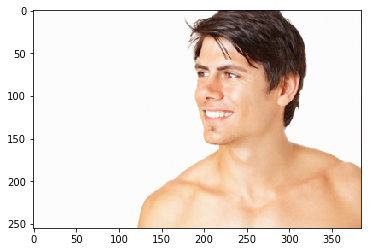

In [10]:
img = plt.imread(f'{PATH}{train_path}{class1_path}{files[0]}')
plt.imshow(img)

In [11]:
img.shape

(255, 384, 3)

In [12]:
img[:4, :4]

array([[[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]]], dtype=uint8)

## Uncomment if needing to resize images 

> <div class="alert alert-block alert-warning">
Possible problems with it storing them in *tmp* folder
</div>

In [13]:
#from sklearn import metrics 

#def get_data(sz, bs):
#   tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#   data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs)
#   return data if sz > 300 else data.resize(340, 'tmp');

In [14]:
arch = resnet50
sz = 299 # One of two standards for ImageNet (224)
bs = 32 # 64 resulted in cuda-out-of-memory-error

In [15]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, ps=0.2)

## Choosing a Learning Rate

In [16]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 40%|████      | 2/5 [00:02<00:03,  1.05s/it, loss=0.949]


OSError: Error handling image at: data/train/Female_face/Female_face.31.jpg

## Problems because of non-valid image types

> <div class="alert alert-block alert-info">
Can use module *imghdr* to verify image types
</div>

In [ ]:
import imghdr
imghdr.what(f'{PATH}{train_path}{class1_path}{files[0]}')

### Need to loop through datasets to remove invalid images 

> <div class="alert alert-block alert-info">
But first, interesting to see how much data we will be losing
</div>

In [ ]:
class1_train = PATH + train_path + class1_path
class2_train = PATH + train_path + class2_path
class1_valid = PATH + valid_path + class1_path
class2_valid = PATH + valid_path + class2_path

In [ ]:
print(class1_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class1_path)))
print(class2_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class2_path)))
print(class1_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class1_path)))
print(class2_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class2_path)))

In [ ]:
file_paths = [class1_train, 
              class2_train, 
              class1_valid, 
              class2_valid]
for path in file_paths:
    for files in os.listdir(path):
        if imghdr.what(path + files) != 'jpeg':
            print("Deleting " + files + " in folder " + path + ", should be " + str(imghdr.what(path+files)))
            os.remove(path + files)

In [ ]:
print(class1_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class1_path)))
print(class2_path[:-1] + " training files: " , len(os.listdir(PATH + train_path + class2_path)))
print(class1_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class1_path)))
print(class2_path[:-1] + " validation files: " , len(os.listdir(PATH + valid_path + class2_path)))

## NOTE: May be possible to switch image types, so to minimize data loss 
### Difficult when Image type is None? 

## New data set, so new training

In [ ]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, ps=0.2)

In [ ]:
learn.lr_find()

In [ ]:
learn.sched.plot()

## Not enough data - Will be added when eliminated 100-limit

In [ ]:
learn.fit(1e-2, 3, cycle_len=2)

In [ ]:
learn.unfreeze()

In [ ]:
lr = np.array([1e-4, 1e-3, 1e-2])

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

accuracy_np(probs, y)

## Overfitting

### When *validation loss* >> *training* 

> <div class="alert alert-block alert-info">
Increase dropout, unfreeze and use differential learning rates
</div>

### Use an Optimizer? 

In [ ]:
learn = ConvLearner.pretrained(arch, data, ps=[0.2, 0.4, 0.7])
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
ps = [0.2, 0.4, 0.6]
learn = ConvLearner.pretrained(arch, data, ps=ps)
learn.fit(1e-2, 3, cycle_len=2)

In [ ]:
lr = [1e-8, 1e-4, 1e-2]
learn.unfreeze()
learn.fit(lr, 3, cycle_len=2, cycle_mult=2)

In [ ]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

accuracy_np(probs, y)

### Analyzing Results

In [ ]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [ ]:
plot_confusion_matrix(cm, data.classes)

## Hard to get an improved result with very limited amounts of data - will (hopefully) improve when 100 images-limit is eliminated 

# Analyzing the results - vizualising the Images

In [ ]:
# This is the label for a val data
data.val_y

In [ ]:
# from here we know that 'female_face' is label 0 and 'male_face' is label 1.
data.classes

In [ ]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

In [ ]:
log_preds[:10]

In [ ]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [ ]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [ ]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [ ]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [ ]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [ ]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [ ]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [ ]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

In [ ]:
plot_val_with_title(most_by_correct(0, True), "Most correct female faces")

In [ ]:
plot_val_with_title(most_by_correct(1, True), "Most correct male faces")

In [ ]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect female faces")

In [ ]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect male faces")

In [ ]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")